# Analysing the housing prices in Iowa

### Pre-process data

In [32]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
data = r'/Users/OliverPan/Desktop/house/train.csv'

In [34]:
df = pd.read_csv(data)

In [35]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Target value is column "Sale Price"

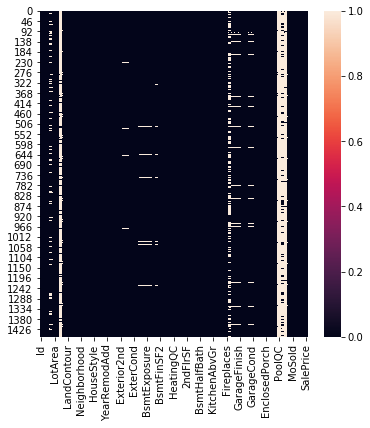

In [36]:
### See NaN Values

plt.figure(figsize=[6,6])
sns.heatmap(df.isnull())

#### There are some columns that have a large amount of NaN values
#### We can check to be sure
#### I will drop volumns with NaN values

In [37]:
na_check = df.isnull().sum().to_frame()
na_check = na_check[na_check[0] != 0]

In [38]:
na_check.head()

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37


In [39]:
df = df.drop(["LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual"], axis = 1)

### Looking at high correlation, which will potentially throw off model

In [43]:
#Filter df
high_corr = df.corr().abs().unstack()
sort = high_corr.sort_values(kind="quicksort")
sort = sort.to_frame()

#Look at correlation that is higher than 0.7 and not 1
sort = sort[sort[0] >= 0.7]
sort = sort[sort[0] != 1]

In [44]:
sort

,,0
SalePrice,GrLivArea,0.708624
GrLivArea,SalePrice,0.708624
SalePrice,OverallQual,0.790982
OverallQual,SalePrice,0.790982
1stFlrSF,TotalBsmtSF,0.819530
TotalBsmtSF,1stFlrSF,0.819530
TotRmsAbvGrd,GrLivArea,0.825489
GrLivArea,TotRmsAbvGrd,0.825489
YearBuilt,GarageYrBlt,0.825667
GarageYrBlt,YearBuilt,0.825667


In [ ]:
#### We can see that OverallQual is highly correlated, which means that it may not be the best variable for the model
#### Garage looks like it can be seperated into its own dataframe for analysis, refer to garage_analysis.ipynb

### Sales metric

In [38]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Ideas down the road
#### - continue to analyze variables to see if feature is important. We can use models to test this.
#### - test out different regressors and baseline models
#### - create dataframe of RMSE, per each model used

In [ ]:
### We can use various types of correlation, since our data is continuous to continuous (For example, Kendall or Pearson)